In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = "/content/drive/MyDrive/Data /CCLE_expression.csv"
path2= "/content/drive/MyDrive/Data /primary-screen-replicate-collapsed-logfold-change.csv"
cellLines = pd.read_csv(path1)
drug = pd.read_csv(path2)


In [ ]:
cellLines

,Unnamed: 0,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),STPG1 (90529),NIPAL3 (57185),LAS1L (81887),ENPP4 (22875),SEMA3F (6405),CFTR (1080),ANKIB1 (54467),CYP51A1 (1595),KRIT1 (889),RAD52 (5893),BAD (572),LAP3 (51056),CD99 (4267),HS3ST1 (9957),AOC1 (26),WNT16 (51384),HECW1 (23072),MAD1L1 (8379),LASP1 (3927),SNX11 (29916),TMEM176A (55365),M6PR (4074),KLHL13 (90293),CYP26B1 (56603),ICA1 (3382),DBNDD1 (79007),ALS2 (57679),CASP10 (843),CFLAR (8837),...,PRSS50 (29122),CPHXL (105371346),AC131160.1 (55486),TPTEP2-CSNK1E (102800317),GNG14 (105372280),SLURP2 (432355),AC069544.2 (100421372),SCO2 (9997),C2orf81 (388963),PERCC1 (105371045),THSD8 (10535),LYNX1-SLURP2 (111188157),OR8B3 (390271),OR4F16 (81399),OR8B2 (26595),TMEM247 (388946),SMIM38 (107984345),OR8S1 (341568),OR4F29 (729759),EEF1AKMT4 (110599564),AC022414.1 (8622),TBCE (6905),SMIM41 (113523638),AC008397.1 (729966),GCSAML-AS1 (148824),CCDC39 (339829),EEF1AKMT4-ECE2 (110599583),AP000812.4 (220074),UPK3BL2 (107983993),AC093512.2 (112694756),ARHGAP11B (89839),AC004593.2 (1124),AC090517.4 (54816),AL160269.1 (11046),ABCF2-H2BE1 (114483834),POLR2J3 (548644),H2BE1 (114483833),AL445238.1 (647264),GET1-SH3BGR (106865373),AC113348.1 (102724657)
0,ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,5.053980,3.456806,4.415488,4.766595,2.280956,3.237258,0.000000,5.125982,6.636770,5.638364,3.881665,5.156639,4.775051,5.904966,0.097611,0.111031,0.042644,2.847997,3.336283,5.371210,4.313971,0.000000,7.536830,5.207893,2.965323,1.922198,2.049631,4.478972,2.077243,5.101818,...,0.748461,0.042644,1.782409,0.356144,0.650765,0.411426,2.895303,0.765535,1.731183,0.056584,0.695994,0.070389,0.0,0.070389,0.0,0.0,0.389567,0.0,0.070389,4.578335,0.000000,5.761019,0.000000,0.000000,0.0,0.028569,0.000000,1.464668,5.234961,4.139961,1.214125,0.000000,0.111031,0.150560,1.427606,5.781884,0.000000,0.000000,0.799087,0.000000
1,ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,3.832890,1.910733,3.374344,4.861955,3.625270,1.275007,0.028569,5.177121,7.130313,5.061776,3.023255,5.542258,6.305423,6.641546,0.084064,0.014355,0.275007,0.189034,2.903038,4.955127,4.421560,0.042644,7.133091,2.861955,0.124328,3.513491,4.056584,4.286142,0.333424,4.520422,...,0.000000,0.000000,1.799087,0.526069,0.000000,0.000000,4.202418,0.298658,0.765535,0.000000,4.173927,0.189034,0.0,0.014355,0.0,0.0,0.028569,0.0,0.014355,2.182692,0.042644,5.771357,0.000000,0.000000,0.0,1.090853,0.000000,1.490570,0.941106,4.107688,1.835924,0.000000,0.310340,0.000000,0.807355,4.704319,0.000000,0.000000,0.464668,0.070389
2,ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,3.775051,2.895303,3.613532,4.300856,0.799087,0.275007,0.042644,4.149747,5.655352,4.858976,2.675816,4.560715,6.170125,8.182245,0.389567,0.084064,0.084064,0.084064,5.733625,6.274262,4.407353,0.214125,7.361417,0.137504,0.454176,2.301588,3.317594,3.746313,1.232661,4.750607,...,0.014355,0.000000,0.992768,0.201634,0.000000,0.014355,3.209453,0.344828,0.555816,0.000000,2.952334,0.070389,0.0,0.014355,0.0,0.0,0.028569,0.0,0.014355,3.012569,0.000000,4.744699,0.000000,0.000000,0.0,0.000000,0.000000,0.985500,1.124328,2.313246,1.823749,0.084064,0.176323,0.042644,1.384050,4.931683,0.000000,0.028569,0.263034,0.000000
3,ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,4.294253,2.472488,4.573496,5.314697,3.488001,2.980025,0.028569,3.872829,6.176921,3.714795,2.726831,5.565293,5.230357,6.811728,2.657640,0.084064,0.124328,0.367371,4.161888,6.703211,3.541019,0.070389,7.208478,0.014355,1.124328,3.946731,3.237258,2.931683,2.797013,4.591560,...,0.000000,0.000000,0.641546,0.042644,0.000000,1.454176,2.438293,0.678072,1.117695,0.000000,0.000000,0.150560,0.0,0.000000,0.0,0.0,0.124328,0.0,0.000000,3.000000,0.000000,4.164304,0.000000,0.454176,0.0,0.000000,0.000000,1.448901,0.201634,

In [ ]:
drug

,Unnamed: 0,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,BRD-A00993607-003-24-6::2.5::HTS,BRD-A01098288-001-02-9::2.5::HTS,BRD-A01412266-001-01-0::2.5::HTS,BRD-A01493904-003-12-1::2.5::HTS,BRD-A01563671-001-02-7::2.5::HTS,BRD-A01593789-001-03-1::2.5::HTS,BRD-A01636364-003-15-1::2.5::HTS,BRD-A01643550-001-04-9::2.5::HTS,BRD-A01787639-003-16-9::2.5::HTS,BRD-A01907367-001-01-7::2.5::HTS,BRD-A02006392-001-16-4::2.5::HTS,BRD-A02180903-001-04-5::2.5::HTS,BRD-A02710418-003-11-8::2.5::HTS,BRD-A02743701-001-03-6::2.5::HTS,BRD-A02759312-003-24-5::2.5::HTS,BRD-A02990301-003-06-6::2.5::HTS,BRD-A03061970-003-07-3::2.5::HTS,BRD-A03216249-003-24-3::2.5::HTS,BRD-A03359064-001-02-3::2.5::HTS,BRD-A03506276-001-01-5::2.5::HTS,BRD-A03623303-045-09-5::2.5::HTS,BRD-A03880619-001-01-0::2.5::HTS,BRD-A03932035-004-04-3::2.5::HTS,BRD-A04203391-001-08-3::2.5::HTS,BRD-A04252265-003-01-4::2.5::HTS,BRD-A04322457-003-17-9::2.5::HTS,BRD-A04327189-001-15-1::2.5::HTS,BRD-A04327189-003-03-3::2.5::HTS,BRD-A04352665-001-05-3::2.5::HTS,...,BRD-K90563805-001-02-6::2.5::MTS004,BRD-K90629600-001-01-4::2.5::MTS004,BRD-K90982969-001-01-2::2.5::MTS004,BRD-K91244729-003-01-3::2.316613157::MTS004,BRD-K91405252-001-01-9::2.500076093::MTS004,BRD-K91543828-001-02-0::2.500044381::MTS004,BRD-K91900765-001-07-6::2.500030257::MTS004,BRD-K92073408-001-15-7::2.5::MTS004,BRD-K92413528-001-06-9::2.5::MTS004,BRD-K92426617-001-06-3::2.5::MTS004,BRD-K92490248-001-06-6::2.500037393::MTS004,BRD-K92581468-001-01-6::2.389082227::MTS004,BRD-K92902018-001-01-9::2.507952536::MTS004,BRD-K92908289-001-01-8::2.501017998::MTS004,BRD-K93442924-001-03-4::2.5::MTS004,BRD-K93900986-001-15-0::2.613957824::MTS004,BRD-K94072573-001-09-9::2.5::MTS004,BRD-K94146583-001-01-6::2.500085506::MTS004,BRD-K94830213-001-01-3::2.635005669::MTS004,BRD-K95362002-001-01-1::2.354783058::MTS004,BRD-K95941975-001-01-5::2.5::MTS004,BRD-K96206066-001-07-9::2.591957442::MTS004,BRD-K96344439-002-02-7::2.500011072::MTS004,BRD-K96471533-001-09-0::2.592774962::MTS004,BRD-K96669468-300-01-1::2.5::MTS004,BRD-K96691275-001-01-2::2.5::MTS004,BRD-K96734425-304-01-7::2.500007729::MTS004,BRD-K96874295-015-01-0::2.500009134::MTS004,BRD-K97939847-001-12-0::2.5::MTS004,BRD-K98054437-001-09-9::2.494413182::MTS004,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
0,ACH-000001,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,0.644137,-0.371126,0.425098,NaN,0.287026,0.410469,0.404994,0.702347,-0.648735,0.537157,-0.051923,-0.463111,0.213471,0.513649,0.561612,0.092447,-0.840919,0.609556,-1.401019,0.774219,-1.411322,-0.139209,0.265538,0.648261,-0.382506,NaN,0.058709,-0.329350,0.227541,0.212912,...,-0.058402,0.387044,0.385874,0.400234,0.199965,0.005106,0.528592,0.014759,-0.070412,0.086858,0.027550,0.024090,-0.051964,0.160257,-0.248010,0.133490,0.283482,0.000754,-0.007040,0.448325,-0.091233,-0.063261,-0.331619,0.671945,0.200060,0.256095,0.154881,0.383746,0.032667,-0.087383,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
1,ACH-000007,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,-0.277105,-1.249108,-0.525292,0.400643,-0.732619,0.065891,-1.116199,0.527021,-1.631676,-0.579875,0.556004,0.423156,0.176780,0.192204,-0.015698,0.124954,-0.364671,0.239814,-0.291710,-0.131295,-2.565264,-0.365848,-0.21

In [ ]:
cellLine2 = cellLines.rename(columns={'Unnamed: 0': 'CellLine'})

NameError: ignored

In [ ]:
columns = ['CellLine','GGCT (79017)', 'CAPN1 (823)', 'SYT13 (57586)', 'MLH1 (4292)',
       'CRYBA1 (1411)', 'MRPL27 (51264)', 'ZNF557 (79230)',
       'COX17 (10063)', 'NPFF (8620)', 'EIF2D (1939)', 'TFB2M (64216)',
       'ZBTB41 (360023)', 'SDR42E1 (93517)', 'SCN10A (6336)',
       'PSORS1C1 (170679)']
#columns=df2.columns
cellLine2 = pd.DataFrame(cellLines, columns=columns)

In [ ]:
cellLine2

,CellLine,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679)
0,NaN,6.327867,6.167920,0.070389,5.153805,0.000000,6.872583,2.498251,6.921960,0.000000,5.186263,5.716168,4.286142,1.400538,0.000000,1.327687
1,NaN,6.911332,6.042863,0.000000,5.794676,0.000000,7.792725,2.014355,6.519479,0.613532,5.392661,3.936402,2.367371,0.000000,0.000000,0.464668
2,NaN,7.288543,5.432291,0.042644,5.107269,0.000000,7.350586,1.731183,7.730776,0.000000,4.958379,4.812498,2.260026,0.014355,0.000000,0.443607
3,NaN,6.935106,7.260778,0.367371,5.649041,0.000000,6.096346,1.704872,7.196922,0.124328,5.130519,3.853996,2.454176,3.624101,0.014355,1.443607
4,NaN,7.539314,8.595407,0.028569,5.309249,0.000000,7.341986,2.117695,6.078951,0.084064,4.977280,4.826294,1.613532,4.256256,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,NaN,5.667324,6.142413,0.014355,5.001352,0.056584,6.895787,1.356144,5.624393,0.097611,5.656496,4.577127,2.025029,0.000000,0.000000,0.970854
1375,NaN,6.872706,6.291125,0.111031,5.525756,0.505891,6.862575,2.627607,6.996276,0.432959,5.503985,5.953032,3.263034,0.014355,0.000000,0.739848
1376,NaN,6.171527,6.989253,0.014355,4.302319,0.111031,6.626585,0.879706,6.035844,0.000000,5.225738,4.314697,3.388190,1.084064,0.000000,1.937344
1377,NaN,6.696828,7.339226,2.944858,4.716991,0.000000,7.484863,2.130931,6.268097,0.042644,4.884598,4.915999,2.039138,3.215679,0.000000,3.220330


In [ ]:
drug  = drug.rename(columns={'Unnamed: 0': 'CellLine'})

In [ ]:
cellLine2.isnull().sum()

CellLine             1379
GGCT (79017)            0
CAPN1 (823)             0
SYT13 (57586)           0
MLH1 (4292)             0
CRYBA1 (1411)           0
MRPL27 (51264)          0
ZNF557 (79230)          0
COX17 (10063)           0
NPFF (8620)             0
EIF2D (1939)            0
TFB2M (64216)           0
ZBTB41 (360023)         0
SDR42E1 (93517)         0
SCN10A (6336)           0
PSORS1C1 (170679)       0
dtype: int64

In [ ]:
cellLine2.isnull().values.any()

True

In [ ]:
cellLine2.isnull().T.any().T.sum()

1379

In [ ]:
#Drop the duplicate columns 
cellLine2=cellLine2.T.drop_duplicates().T

In [ ]:
cellLine2.shape

(1379, 16)

In [ ]:
sampleSet=cellLine2
df11= sampleSet.iloc[:, 1:]
df11

,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679)
0,6.327867,6.167920,0.070389,5.153805,0.000000,6.872583,2.498251,6.921960,0.000000,5.186263,5.716168,4.286142,1.400538,0.000000,1.327687
1,6.911332,6.042863,0.000000,5.794676,0.000000,7.792725,2.014355,6.519479,0.613532,5.392661,3.936402,2.367371,0.000000,0.000000,0.464668
2,7.288543,5.432291,0.042644,5.107269,0.000000,7.350586,1.731183,7.730776,0.000000,4.958379,4.812498,2.260026,0.014355,0.000000,0.443607
3,6.935106,7.260778,0.367371,5.649041,0.000000,6.096346,1.704872,7.196922,0.124328,5.130519,3.853996,2.454176,3.624101,0.014355,1.443607
4,7.539314,8.595407,0.028569,5.309249,0.000000,7.341986,2.117695,6.078951,0.084064,4.977280,4.826294,1.613532,4.256256,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,5.667324,6.142413,0.014355,5.001352,0.056584,6.895787,1.356144,5.624393,0.097611,5.656496,4.577127,2.025029,0.000000,0.000000,0.970854
1375,6.872706,6.291125,0.111031,5.525756,0.505891,6.862575,2.627607,6.996276,0.432959,5.503985,5.953032,3.263034,0.014355,0.000000,0.739848
1376,6.171527,6.989253,0.014355,4.302319,0.111031,6.626585,0.879706,6.035844,0.000000,5.225738,4.314697,3.388190,1.084064,0.000000,1.937344
1377,6.696828,7.339226,2.944858,4.716991,0.000000,7.484863,2.130931,6.268097,0.042644,4.884598,4.915999,2.039138,3.215679,0.000000,3.220330


In [ ]:
#NORMALIZED CELL LINE DATA
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
celldata =df11[df11.columns[0:19168 ]] 
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(celldata), columns=celldata.columns)


df_norm

,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679)
0,0.673677,0.580668,0.008728,0.766857,0.000000,0.586825,0.654082,0.604770,0.000000,0.698966,0.841196,0.818674,0.279755,0.00000,0.238021
1,0.737308,0.564724,0.000000,0.862215,0.000000,0.754838,0.509420,0.526723,0.130114,0.727241,0.538784,0.425890,0.000000,0.00000,0.083303
2,0.778445,0.486878,0.005288,0.759932,0.000000,0.674106,0.424765,0.761612,0.000000,0.667747,0.687647,0.403915,0.002867,0.00000,0.079527
3,0.739900,0.720004,0.045551,0.840545,0.000000,0.445088,0.416899,0.658089,0.026367,0.691329,0.524782,0.443659,0.723908,0.01262,0.258802
4,0.805793,0.890164,0.003542,0.789986,0.000000,0.672535,0.540313,0.441298,0.017828,0.670337,0.689992,0.271574,0.850180,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.601640,0.577416,0.001780,0.744173,0.021709,0.591062,0.312646,0.353152,0.020701,0.763385,0.647654,0.355810,0.000000,0.00000,0.174049
1375,0.733095,0.596376,0.013767,0.822201,0.194093,0.584997,0.692753,0.619181,0.091819,0.742491,0.881444,0.609237,0.002867,0.00000,0.132636
1376,0.656627,0.685385,0.001780,0.640160,0.042599,0.541907,0.170213,0.432939,0.000000,0.704374,0.603063,0.634858,0.216540,0.00000,0.347317
1377,0.713915,0.730006,0.365135,0.701861,0.000000,0.698624,0.544270,0.477976,0.009044,0.657640,0.705234,0.358698,0.642327,0.00000,0.577324


In [ ]:
GeneFeatures = pd.DataFrame(df_norm)

In [ ]:
GeneFeatures

,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679)
0,0.673677,0.580668,0.008728,0.766857,0.000000,0.586825,0.654082,0.604770,0.000000,0.698966,0.841196,0.818674,0.279755,0.00000,0.238021
1,0.737308,0.564724,0.000000,0.862215,0.000000,0.754838,0.509420,0.526723,0.130114,0.727241,0.538784,0.425890,0.000000,0.00000,0.083303
2,0.778445,0.486878,0.005288,0.759932,0.000000,0.674106,0.424765,0.761612,0.000000,0.667747,0.687647,0.403915,0.002867,0.00000,0.079527
3,0.739900,0.720004,0.045551,0.840545,0.000000,0.445088,0.416899,0.658089,0.026367,0.691329,0.524782,0.443659,0.723908,0.01262,0.258802
4,0.805793,0.890164,0.003542,0.789986,0.000000,0.672535,0.540313,0.441298,0.017828,0.670337,0.689992,0.271574,0.850180,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.601640,0.577416,0.001780,0.744173,0.021709,0.591062,0.312646,0.353152,0.020701,0.763385,0.647654,0.355810,0.000000,0.00000,0.174049
1375,0.733095,0.596376,0.013767,0.822201,0.194093,0.584997,0.692753,0.619181,0.091819,0.742491,0.881444,0.609237,0.002867,0.00000,0.132636
1376,0.656627,0.685385,0.001780,0.640160,0.042599,0.541907,0.170213,0.432939,0.000000,0.704374,0.603063,0.634858,0.216540,0.00000,0.347317
1377,0.713915,0.730006,0.365135,0.701861,0.000000,0.698624,0.544270,0.477976,0.009044,0.657640,0.705234,0.358698,0.642327,0.00000,0.577324


In [ ]:
first_column= cellLine2.pop('CellLine')
GeneFeatures.insert(0, 'CellLine', first_column)

In [ ]:
GeneFeatures

,CellLine,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679)
0,NaN,0.673677,0.580668,0.008728,0.766857,0.000000,0.586825,0.654082,0.604770,0.000000,0.698966,0.841196,0.818674,0.279755,0.00000,0.238021
1,NaN,0.737308,0.564724,0.000000,0.862215,0.000000,0.754838,0.509420,0.526723,0.130114,0.727241,0.538784,0.425890,0.000000,0.00000,0.083303
2,NaN,0.778445,0.486878,0.005288,0.759932,0.000000,0.674106,0.424765,0.761612,0.000000,0.667747,0.687647,0.403915,0.002867,0.00000,0.079527
3,NaN,0.739900,0.720004,0.045551,0.840545,0.000000,0.445088,0.416899,0.658089,0.026367,0.691329,0.524782,0.443659,0.723908,0.01262,0.258802
4,NaN,0.805793,0.890164,0.003542,0.789986,0.000000,0.672535,0.540313,0.441298,0.017828,0.670337,0.689992,0.271574,0.850180,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,NaN,0.601640,0.577416,0.001780,0.744173,0.021709,0.591062,0.312646,0.353152,0.020701,0.763385,0.647654,0.355810,0.000000,0.00000,0.174049
1375,NaN,0.733095,0.596376,0.013767,0.822201,0.194093,0.584997,0.692753,0.619181,0.091819,0.742491,0.881444,0.609237,0.002867,0.00000,0.132636
1376,NaN,0.656627,0.685385,0.001780,0.640160,0.042599,0.541907,0.170213,0.432939,0.000000,0.704374,0.603063,0.634858,0.216540,0.00000,0.347317
1377,NaN,0.713915,0.730006,0.365135,0.701861,0.000000,0.698624,0.544270,0.477976,0.009044,0.657640,0.705234,0.358698,0.642327,0.00000,0.577324


In [ ]:
drug.isnull().sum()

CellLine                                        0
BRD-A00077618-236-07-6::2.5::HTS                9
BRD-A00100033-001-08-9::2.5::HTS                4
BRD-A00147595-001-01-5::2.5::HTS                9
BRD-A00218260-001-03-4::2.5::HTS               13
                                               ..
BRD-K99506538-001-03-8::2.5::MTS004            30
BRD-K99616396-001-05-1::2.499991421::MTS004    30
BRD-K99879819-001-02-1::2.5187366::MTS004      30
BRD-K99919177-001-01-3::2.5::MTS004            30
BRD-M63173034-001-03-6::2.64076472::MTS004     31
Length: 4687, dtype: int64

In [ ]:
#how many rows there are with "one or more NaNs"
drug.isnull().T.any().T.sum()

449

In [ ]:
#Drop the duplicate columns 
drug=drug.T.drop_duplicates().T

In [ ]:
drug.shape

(578, 4687)

In [ ]:
d=drug

In [ ]:
d=d.drop(['CellLine'], axis = 1)

In [ ]:
d

,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,BRD-A00993607-003-24-6::2.5::HTS,BRD-A01098288-001-02-9::2.5::HTS,BRD-A01412266-001-01-0::2.5::HTS,BRD-A01493904-003-12-1::2.5::HTS,BRD-A01563671-001-02-7::2.5::HTS,BRD-A01593789-001-03-1::2.5::HTS,BRD-A01636364-003-15-1::2.5::HTS,BRD-A01643550-001-04-9::2.5::HTS,BRD-A01787639-003-16-9::2.5::HTS,BRD-A01907367-001-01-7::2.5::HTS,BRD-A02006392-001-16-4::2.5::HTS,BRD-A02180903-001-04-5::2.5::HTS,BRD-A02710418-003-11-8::2.5::HTS,BRD-A02743701-001-03-6::2.5::HTS,BRD-A02759312-003-24-5::2.5::HTS,BRD-A02990301-003-06-6::2.5::HTS,BRD-A03061970-003-07-3::2.5::HTS,BRD-A03216249-003-24-3::2.5::HTS,BRD-A03359064-001-02-3::2.5::HTS,BRD-A03506276-001-01-5::2.5::HTS,BRD-A03623303-045-09-5::2.5::HTS,BRD-A03880619-001-01-0::2.5::HTS,BRD-A03932035-004-04-3::2.5::HTS,BRD-A04203391-001-08-3::2.5::HTS,BRD-A04252265-003-01-4::2.5::HTS,BRD-A04322457-003-17-9::2.5::HTS,BRD-A04327189-001-15-1::2.5::HTS,BRD-A04327189-003-03-3::2.5::HTS,BRD-A04352665-001-05-3::2.5::HTS,BRD-A04497688-001-04-2::2.5::HTS,...,BRD-K90563805-001-02-6::2.5::MTS004,BRD-K90629600-001-01-4::2.5::MTS004,BRD-K90982969-001-01-2::2.5::MTS004,BRD-K91244729-003-01-3::2.316613157::MTS004,BRD-K91405252-001-01-9::2.500076093::MTS004,BRD-K91543828-001-02-0::2.500044381::MTS004,BRD-K91900765-001-07-6::2.500030257::MTS004,BRD-K92073408-001-15-7::2.5::MTS004,BRD-K92413528-001-06-9::2.5::MTS004,BRD-K92426617-001-06-3::2.5::MTS004,BRD-K92490248-001-06-6::2.500037393::MTS004,BRD-K92581468-001-01-6::2.389082227::MTS004,BRD-K92902018-001-01-9::2.507952536::MTS004,BRD-K92908289-001-01-8::2.501017998::MTS004,BRD-K93442924-001-03-4::2.5::MTS004,BRD-K93900986-001-15-0::2.613957824::MTS004,BRD-K94072573-001-09-9::2.5::MTS004,BRD-K94146583-001-01-6::2.500085506::MTS004,BRD-K94830213-001-01-3::2.635005669::MTS004,BRD-K95362002-001-01-1::2.354783058::MTS004,BRD-K95941975-001-01-5::2.5::MTS004,BRD-K96206066-001-07-9::2.591957442::MTS004,BRD-K96344439-002-02-7::2.500011072::MTS004,BRD-K96471533-001-09-0::2.592774962::MTS004,BRD-K96669468-300-01-1::2.5::MTS004,BRD-K96691275-001-01-2::2.5::MTS004,BRD-K96734425-304-01-7::2.500007729::MTS004,BRD-K96874295-015-01-0::2.500009134::MTS004,BRD-K97939847-001-12-0::2.5::MTS004,BRD-K98054437-001-09-9::2.494413182::MTS004,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
0,-0.0155766,-0.449332,0.489379,0.206675,0.27273,0.0210361,-0.0254604,0.467158,-0.736306,0.644137,-0.371126,0.425098,NaN,0.287026,0.410469,0.404994,0.702347,-0.648735,0.537157,-0.0519229,-0.463111,0.213471,0.513649,0.561612,0.0924474,-0.840919,0.609556,-1.40102,0.774219,-1.41132,-0.139209,0.265538,0.648261,-0.382506,NaN,0.0587091,-0.32935,0.227541,0.212912,0.179076,...,-0.0584021,0.387044,0.385874,0.400234,0.199965,0.0051063,0.528592,0.0147586,-0.0704117,0.0868584,0.0275497,0.02409,-0.0519644,0.160257,-0.24801,0.13349,0.283482,0.000753832,-0.00704004,0.448325,-0.091233,-0.0632613,-0.331619,0.671945,0.20006,0.256095,0.154881,0.383746,0.0326669,-0.0873827,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.15365,0.510464
1,-0.0957303,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.28851,-0.476133,-0.277105,-1.24911,-0.525292,0.400643,-0.732619,0.0658914,-1.1162,0.527021,-1.63168,-0.579875,0.556004,0.423156,0.17678,0.192204,-0.0156983,0.124954,-0.364671,0.239814,-0.29171,-0.131295,-2.56526

In [ ]:
dmean=d.mean()

In [ ]:
dmean

BRD-A00077618-236-07-6::2.5::HTS              -0.006395
BRD-A00100033-001-08-9::2.5::HTS              -0.206873
BRD-A00147595-001-01-5::2.5::HTS               0.057744
BRD-A00218260-001-03-4::2.5::HTS               0.243870
BRD-A00376169-001-01-6::2.5::HTS              -0.168988
                                                 ...   
BRD-K99506538-001-03-8::2.5::MTS004            0.031721
BRD-K99616396-001-05-1::2.499991421::MTS004   -0.067992
BRD-K99879819-001-02-1::2.5187366::MTS004     -0.036234
BRD-K99919177-001-01-3::2.5::MTS004           -2.488484
BRD-M63173034-001-03-6::2.64076472::MTS004     0.132331
Length: 4686, dtype: float64

In [ ]:
drug1=drug.fillna(dmean)

In [ ]:
d2=drug1

In [ ]:
drug1.isnull().T.any().T.sum()

0

In [ ]:
print(drug1.isnull().sum(axis = 0))

CellLine                                       0
BRD-A00077618-236-07-6::2.5::HTS               0
BRD-A00100033-001-08-9::2.5::HTS               0
BRD-A00147595-001-01-5::2.5::HTS               0
BRD-A00218260-001-03-4::2.5::HTS               0
                                              ..
BRD-K99506538-001-03-8::2.5::MTS004            0
BRD-K99616396-001-05-1::2.499991421::MTS004    0
BRD-K99879819-001-02-1::2.5187366::MTS004      0
BRD-K99919177-001-01-3::2.5::MTS004            0
BRD-M63173034-001-03-6::2.64076472::MTS004     0
Length: 4687, dtype: int64


In [ ]:
DD= drug[drug.columns[0:37]]

In [ ]:
a=list(DD)

In [ ]:
len(a)

37

In [ ]:
import re
key2=[]

pattern='\::.*$'
for i in range(37) :
  key1 = re.sub(pattern,"", str(a[i]))
  key2.append(key1)

In [ ]:
key2

['CellLine',
 'BRD-A00077618-236-07-6',
 'BRD-A00100033-001-08-9',
 'BRD-A00147595-001-01-5',
 'BRD-A00218260-001-03-4',
 'BRD-A00376169-001-01-6',
 'BRD-A00520476-001-07-4',
 'BRD-A00546892-001-02-6',
 'BRD-A00578795-001-04-3',
 'BRD-A00758722-001-04-9',
 'BRD-A00827783-001-24-6',
 'BRD-A00993607-003-24-6',
 'BRD-A01098288-001-02-9',
 'BRD-A01412266-001-01-0',
 'BRD-A01493904-003-12-1',
 'BRD-A01563671-001-02-7',
 'BRD-A01593789-001-03-1',
 'BRD-A01636364-003-15-1',
 'BRD-A01643550-001-04-9',
 'BRD-A01787639-003-16-9',
 'BRD-A01907367-001-01-7',
 'BRD-A02006392-001-16-4',
 'BRD-A02180903-001-04-5',
 'BRD-A02710418-003-11-8',
 'BRD-A02743701-001-03-6',
 'BRD-A02759312-003-24-5',
 'BRD-A02990301-003-06-6',
 'BRD-A03061970-003-07-3',
 'BRD-A03216249-003-24-3',
 'BRD-A03359064-001-02-3',
 'BRD-A03506276-001-01-5',
 'BRD-A03623303-045-09-5',
 'BRD-A03880619-001-01-0',
 'BRD-A03932035-004-04-3',
 'BRD-A04203391-001-08-3',
 'BRD-A04252265-003-01-4',
 'BRD-A04322457-003-17-9']

In [ ]:
DD= DD.set_axis(key2, axis=1)

In [ ]:
Melting = DD.melt(id_vars=["CellLine"])
Melting.rename(columns = {'variable':'Drug_ID'}, inplace = True)
Melting.rename(columns = {'value':'IC50'}, inplace = True)
Mean_IC50 = Melting.IC50.values
Melting

,CellLine,Drug_ID,IC50
0,ACH-000001,BRD-A00077618-236-07-6,-0.0155766
1,ACH-000007,BRD-A00077618-236-07-6,-0.0957303
2,ACH-000008,BRD-A00077618-236-07-6,0.37948
3,ACH-000010_FAILED_STR,BRD-A00077618-236-07-6,0.11889
4,ACH-000011,BRD-A00077618-236-07-6,0.145346
...,...,...,...
20803,ACH-001239,BRD-A04322457-003-17-9,0.369926
20804,ACH-001306,BRD-A04322457-003-17-9,-0.0399135
20805,ACH-001307,BRD-A04322457-003-17-9,0.40481
20806,ACH-001318,BRD-A04322457-003-17-9,0.0744134


In [ ]:
Melting.iloc[3]

CellLine     ACH-000010_FAILED_STR
Drug_ID     BRD-A00077618-236-07-6
IC50                       0.11889
Name: 3, dtype: object

In [ ]:
#Melting.xs(3)['CellLine']='ACH-000010'
Melting.at[3,'CellLine']='ACH-000010'

In [ ]:
Melting

,CellLine,Drug_ID,IC50
0,ACH-000001,BRD-A00077618-236-07-6,-0.0155766
1,ACH-000007,BRD-A00077618-236-07-6,-0.0957303
2,ACH-000008,BRD-A00077618-236-07-6,0.37948
3,ACH-000010,BRD-A00077618-236-07-6,0.11889
4,ACH-000011,BRD-A00077618-236-07-6,0.145346
...,...,...,...
20803,ACH-001239,BRD-A04322457-003-17-9,0.369926
20804,ACH-001306,BRD-A04322457-003-17-9,-0.0399135
20805,ACH-001307,BRD-A04322457-003-17-9,0.40481
20806,ACH-001318,BRD-A04322457-003-17-9,0.0744134


In [ ]:
mean=GeneFeatures.mean()

In [ ]:
mean

CellLine                  NaN
GGCT (79017)         0.678706
CAPN1 (823)          0.600034
SYT13 (57586)        0.100008
MLH1 (4292)          0.714874
CRYBA1 (1411)        0.018028
MRPL27 (51264)       0.540640
ZNF557 (79230)       0.424664
COX17 (10063)        0.486826
NPFF (8620)          0.032352
EIF2D (1939)         0.713285
TFB2M (64216)        0.618244
ZBTB41 (360023)      0.405520
SDR42E1 (93517)      0.251928
SCN10A (6336)        0.003538
PSORS1C1 (170679)    0.244041
dtype: float64

In [ ]:
Melting.IC50.isnull().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
20803    False
20804    False
20805    False
20806    False
20807    False
Name: IC50, Length: 20808, dtype: bool>

In [ ]:
print(Melting.isnull().sum(axis = 0))

CellLine      0
Drug_ID       0
IC50        433
dtype: int64


In [ ]:
Melting.dropna(subset = ["IC50"], inplace=True)

In [ ]:
print(Melting.isnull().sum(axis = 0))

CellLine    0
Drug_ID     0
IC50        0
dtype: int64


In [ ]:
Melting.shape

(20375, 3)

In [ ]:
print(GeneFeatures.isnull().sum(axis = 0))

CellLine             1379
GGCT (79017)            0
CAPN1 (823)             0
SYT13 (57586)           0
MLH1 (4292)             0
CRYBA1 (1411)           0
MRPL27 (51264)          0
ZNF557 (79230)          0
COX17 (10063)           0
NPFF (8620)             0
EIF2D (1939)            0
TFB2M (64216)           0
ZBTB41 (360023)         0
SDR42E1 (93517)         0
SCN10A (6336)           0
PSORS1C1 (170679)       0
dtype: int64


In [ ]:
GeneFeatures.dropna(subset = ["CellLine"], inplace=True)

In [ ]:
leftMerge= pd.merge(Melting,GeneFeatures,on='CellLine',how='left')

In [ ]:
leftMerge=leftMerge.fillna(mean)

In [ ]:
leftMerge

,CellLine,Drug_ID,IC50,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679)
0,ACH-000001,BRD-A00077618-236-07-6,-0.0155766,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
1,ACH-000007,BRD-A00077618-236-07-6,-0.0957303,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
2,ACH-000008,BRD-A00077618-236-07-6,0.37948,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
3,ACH-000010,BRD-A00077618-236-07-6,0.11889,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
4,ACH-000011,BRD-A00077618-236-07-6,0.145346,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20370,ACH-001239,BRD-A04322457-003-17-9,0.369926,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
20371,ACH-001306,BRD-A04322457-003-17-9,-0.0399135,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
20372,ACH-001307,BRD-A04322457-003-17-9,0.40481,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041
20373,ACH-001318,BRD-A04322457-003-17-9,0.0744134,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041


In [ ]:
print(leftMerge.isnull().sum(axis = 0))

CellLine             0
Drug_ID              0
IC50                 0
GGCT (79017)         0
CAPN1 (823)          0
SYT13 (57586)        0
MLH1 (4292)          0
CRYBA1 (1411)        0
MRPL27 (51264)       0
ZNF557 (79230)       0
COX17 (10063)        0
NPFF (8620)          0
EIF2D (1939)         0
TFB2M (64216)        0
ZBTB41 (360023)      0
SDR42E1 (93517)      0
SCN10A (6336)        0
PSORS1C1 (170679)    0
dtype: int64


In [ ]:
path3= "/content/drive/MyDrive/Dresult.csv"
MF = pd.read_csv(path3)

In [ ]:
drugName= MF.columns

In [ ]:
drugName

Index(['BRD-A00077618-236-07-6', 'BRD-A00100033-001-08-9',
       'BRD-A00147595-001-01-5', 'BRD-A00218260-001-03-4',
       'BRD-A00376169-001-01-6', 'BRD-A00520476-001-07-4',
       'BRD-A00546892-001-02-6', 'BRD-A00578795-001-04-3',
       'BRD-A00758722-001-04-9', 'BRD-A00827783-001-24-6',
       'BRD-A00993607-003-24-6', 'BRD-A01098288-001-02-9',
       'BRD-A01412266-001-01-0', 'BRD-A01493904-003-12-1',
       'BRD-A01563671-001-02-7', 'BRD-A01593789-001-03-1',
       'BRD-A01636364-003-15-1', 'BRD-A01643550-001-04-9',
       'BRD-A01787639-003-16-9', 'BRD-A01907367-001-01-7',
       'BRD-A02006392-001-16-4', 'BRD-A02180903-001-04-5',
       'BRD-A02710418-003-11-8', 'BRD-A02743701-001-03-6',
       'BRD-A02759312-003-24-5', 'BRD-A02990301-003-06-6',
       'BRD-A03061970-003-07-3', 'BRD-A03216249-003-24-3',
       'BRD-A03359064-001-02-3', 'BRD-A03506276-001-01-5',
       'BRD-A03623303-045-09-5', 'pBRD-A03880619-001-01-0',
       'BRD-A03932035-004-04-3', 'BRD-A04203391-001-08-

In [ ]:
MF_transposed = MF.T

In [ ]:
MF_transposed


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
BRD-A00077618-236-07-6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
BRD-A00100033-001-08-9,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
BRD-A00147595-001-01-5,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0
BRD-A00218260-001-03-4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BRD-A00376169-001-01-6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
BRD-A00520476-001-07-4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
BRD-A00546892-001-02-6,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
BRD-A00578795-001-04-3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
BRD-A00758722-001-04-9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0
BRD-A00827783-001-24-6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
#MF_transposed.to_csv('/content/drive/MyDrive/Data /drugFeatures.csv')

In [ ]:
path4= "/content/drive/MyDrive/Data /drugFeatures.csv"
MF2 = pd.read_csv(path4)

In [ ]:
MF2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,BRD-A00077618-236-07-6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,BRD-A00100033-001-08-9,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,BRD-A00147595-001-01-5,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,...,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0
3,BRD-A00218260-001-03-4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BRD-A00376169-001-01-6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
5,BRD-A00520476-001-07-4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
6,BRD-A00546892-001-02-6,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
7,BRD-A00578795-001-04-3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,BRD-A00758722-001-04-9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0
9,BRD-A00827783-001-24-6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
MFP = MF2.rename(columns={'Unnamed: 0': 'Drug_ID'})

In [ ]:
MFP.head(5)

,Drug_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,BRD-A00077618-236-07-6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,BRD-A00100033-001-08-9,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,BRD-A00147595-001-01-5,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,...,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0
3,BRD-A00218260-001-03-4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BRD-A00376169-001-01-6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
Melting

,CellLine,Drug_ID,IC50
0,ACH-000001,BRD-A00077618-236-07-6,-0.0155766
1,ACH-000007,BRD-A00077618-236-07-6,-0.0957303
2,ACH-000008,BRD-A00077618-236-07-6,0.37948
3,ACH-000010,BRD-A00077618-236-07-6,0.11889
4,ACH-000011,BRD-A00077618-236-07-6,0.145346
...,...,...,...
20803,ACH-001239,BRD-A04322457-003-17-9,0.369926
20804,ACH-001306,BRD-A04322457-003-17-9,-0.0399135
20805,ACH-001307,BRD-A04322457-003-17-9,0.40481
20806,ACH-001318,BRD-A04322457-003-17-9,0.0744134


In [ ]:
MFP

,Drug_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,BRD-A00077618-236-07-6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,BRD-A00100033-001-08-9,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,BRD-A00147595-001-01-5,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,...,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0
3,BRD-A00218260-001-03-4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BRD-A00376169-001-01-6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
5,BRD-A00520476-001-07-4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
6,BRD-A00546892-001-02-6,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
7,BRD-A00578795-001-04-3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,BRD-A00758722-001-04-9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0
9,BRD-A00827783-001-24-6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
finalMerge= pd.merge(leftMerge,MFP,on='Drug_ID',how='inner')

In [ ]:
finalMerge

,CellLine,Drug_ID,IC50,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,ACH-000001,BRD-A00077618-236-07-6,-0.0155766,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,ACH-000007,BRD-A00077618-236-07-6,-0.0957303,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,ACH-000008,BRD-A00077618-236-07-6,0.37948,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,ACH-000010,BRD-A00077618-236-07-6,0.11889,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
4,ACH-000011,BRD-A00077618-236-07-6,0.145346,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19834,ACH-001239,BRD-A04322457-003-17-9,0.369926,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19835,ACH-001306,BRD-A04322457-003-17-9,-0.0399135,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19836,ACH-001307,BRD-A04322457-003-17-9,0.40481,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19837,ACH-001318,BRD-A04322457-003-17-9,0.0744134,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
print(finalMerge.isnull().sum(axis = 0))

CellLine        0
Drug_ID         0
IC50            0
GGCT (79017)    0
CAPN1 (823)     0
               ..
251             0
252             0
253             0
254             0
255             0
Length: 274, dtype: int64


In [ ]:
print(finalMerge.isnull().sum(axis = 0))

CellLine    0
Drug_ID     0
IC50        0
0           0
1           0
           ..
251         0
252         0
253         0
254         0
255         0
Length: 259, dtype: int64


In [ ]:
print(finalMerge.isnull().sum(axis = 0))

CellLine        0
Drug_ID         0
IC50            0
GGCT (79017)    0
CAPN1 (823)     0
               ..
251             0
252             0
253             0
254             0
255             0
Length: 274, dtype: int64


In [ ]:
finalMerge.to_csv('/content/drive/MyDrive/Data /GA.csv')

In [ ]:
path5= "/content/drive/MyDrive/Data /GA.csv"
GA = pd.read_csv(path5)

In [ ]:
GA

,Unnamed: 0,CellLine,Drug_ID,IC50,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0,ACH-000001,BRD-A00077618-236-07-6,-0.015577,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,1,ACH-000007,BRD-A00077618-236-07-6,-0.095730,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,2,ACH-000008,BRD-A00077618-236-07-6,0.379480,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,3,ACH-000010,BRD-A00077618-236-07-6,0.118890,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
4,4,ACH-000011,BRD-A00077618-236-07-6,0.145346,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19834,19834,ACH-001239,BRD-A04322457-003-17-9,0.369926,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19835,19835,ACH-001306,BRD-A04322457-003-17-9,-0.039914,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19836,19836,ACH-001307,BRD-A04322457-003-17-9,0.404810,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19837,19837,ACH-001318,BRD-A04322457-003-17-9,0.074413,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
x=finalMerge

In [ ]:
x=x.drop(['CellLine','Drug_ID','IC50'], axis = 1)

In [ ]:
x

,GGCT (79017),CAPN1 (823),SYT13 (57586),MLH1 (4292),CRYBA1 (1411),MRPL27 (51264),ZNF557 (79230),COX17 (10063),NPFF (8620),EIF2D (1939),TFB2M (64216),ZBTB41 (360023),SDR42E1 (93517),SCN10A (6336),PSORS1C1 (170679),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
4,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19834,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19835,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19836,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19837,0.678706,0.600034,0.100008,0.714874,0.018028,0.54064,0.424664,0.486826,0.032352,0.713285,0.618244,0.40552,0.251928,0.003538,0.244041,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
x.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
251    int64
252    int64
253    int64
254    int64
255    int64
Length: 256, dtype: object

In [ ]:
x2=x.astype('float')

In [ ]:
x2.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
251    float64
252    float64
253    float64
254    float64
255    float64
Length: 256, dtype: object

In [ ]:
v = x2.to_numpy()

In [ ]:
d2=finalMerge.values

In [ ]:
y = d2[:,2]

In [ ]:
y.shape

(19839,)

In [ ]:
y = d2[:,-1]

In [ ]:
y2 = np.array(finalMerge['IC50'])

In [ ]:
y2.shape

(19839,)

In [ ]:
y.shape

(19839,)

In [ ]:
v.dtype

dtype('float64')

In [ ]:
label=d.iloc[:,2]


In [ ]:
label.shape

(19839,)

In [ ]:
 v1 = np.asarray(v).astype('float64')
 y3 = np.asarray(y2).astype('float64')

In [ ]:
y3.shape

(19839,)

In [ ]:
v1.dtype

dtype('float64')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(v1, y3, test_size = 0.3, random_state=40)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(13887, 271) (13887,) (5952, 271) (5952,)


In [ ]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
inputs.shape

(19839, 271)

In [ ]:
                       


import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
initializer2 = tf.keras.initializers.HeNormal()
num_folds=10
fold_no=1
acc_per_fold=[]
loss_per_fold=[]
kfold = KFold(n_splits=num_folds, shuffle=False)
for train, test in kfold.split(inputs, targets):
  model = Sequential([
    Dense(1000, activation='elu', input_shape=(271,),kernel_initializer=initializer2),
    Dense(800, activation='elu'),
    Dense(500, activation='elu'),
    Dense(100, activation='elu'),
    Dropout(0.1),
    Dense(1)])
  opt = tf.optimizers.Adamax(learning_rate=0.0004,clipvalue=5)
  model.compile(opt,  loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
  history=model.fit(inputs, targets, epochs=100,validation_data=(inputs[test], targets[test]),callbacks=[callback])
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
                     

Epoch 1/100
620/620 [==============================] - 6s 6ms/step - loss: 0.3960 - rmse: 0.6293 - val_loss: 0.2858 - val_rmse: 0.5346
Epoch 2/100
620/620 [==============================] - 4s 6ms/step - loss: 0.2900 - rmse: 0.5385 - val_loss: 0.2841 - val_rmse: 0.5330
Epoch 3/100
620/620 [==============================] - 4s 6ms/step - loss: 0.2878 - rmse: 0.5365 - val_loss: 0.2623 - val_rmse: 0.5121
Epoch 4/100
620/620 [==============================] - 4s 6ms/step - loss: 0.2833 - rmse: 0.5323 - val_loss: 0.2667 - val_rmse: 0.5164
Epoch 5/100
620/620 [==============================] - 4s 6ms/step - loss: 0.2814 - rmse: 0.5304 - val_loss: 0.2754 - val_rmse: 0.5248
Epoch 6/100
620/620 [==============================] - 4s 6ms/step - loss: 0.2740 - rmse: 0.5235 - val_loss: 0.2597 - val_rmse: 0.5096
Epoch 7/100
620/620 [==============================] - 4s 6ms/step - loss: 0.2675 - rmse: 0.5173 - val_loss: 0.2620 - val_rmse: 0.5119
Epoch 8/100
620/620 [==============================] - 

In [ ]:
test_loss, rmse = model.evaluate(X_test, y_test)

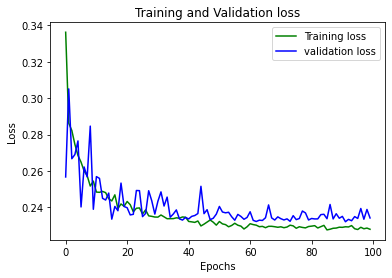

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,100)
plt.plot(history.epoch, loss_train, 'g', label='Training loss')
plt.plot(history.epoch, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
avg=sum(acc_per_fold)/ len(acc_per_fold)


In [ ]:
avg

38.700344264507294